(1000,)


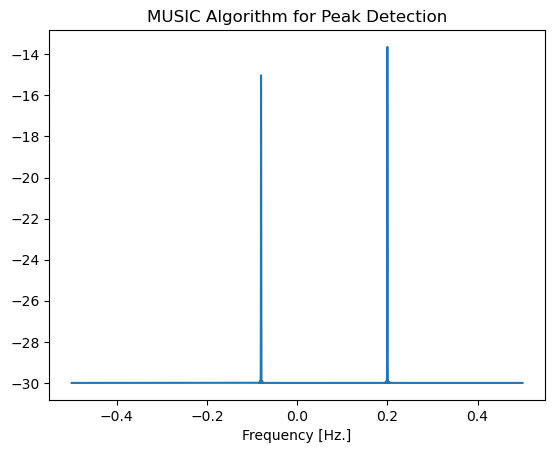

In [2]:
import numpy as np
from numpy import linalg as LA
from matplotlib import pyplot as plt
import scipy

N = 1000
nfft = 2**12

f1 = 20
f2 = -8
fs = 100

t=np.arange(0,N, 1)

c1 = np.exp(1j*2*np.pi*t*f1/fs)
c2 = np.exp(1j*2*np.pi*t*f2/fs)

snr = 10
stdev = 1/((10**(snr/10))**0.5)

data = c1 + c2 + 1/(np.sqrt(2)) * (stdev * np.random.normal(0, 1, N) + 1j * stdev * np.random.normal(0, 1, N))

p = 2
m = len(data)

# Develop autocorrelation matrix of the signal

acf = np.convolve(data,np.conj(data)[::-1])
center = int(np.ceil(len(acf)/2) - 1)
Rxx=acf[center:]
Rx = scipy.linalg.toeplitz(Rxx,np.hstack((Rxx[0], np.conj(Rxx[1:]))))

# Eigenvalue decomposition of the autocorrelation matrix

D, V = LA.eig(Rx)

# Sort the eigenvalues in ascending order 

i = np.array(np.argsort(D))

# freq_array = np.arange(-fs/2, fs/2, fs/nfft)
freq_array = np.arange(-0.5, 0.5, 1/nfft)

sum_array = np.zeros(nfft, dtype=np.float32)

print(np.shape(V[:, i[0]]))

for f in np.arange(0, nfft, 1):

    frequencyVector = np.zeros(m, dtype=np.complex_)

    for index in np.arange(0, m):
        frequencyVector[index] = np.exp(2 * np.pi * index * freq_array[f] * 1j)

    sum = 0
    for index in np.arange(0, m - p):
        sum = sum + np.abs(np.dot(np.transpose(np.conjugate(frequencyVector)), V[:, i[index]]))**2

    sum_array[f] = 10*np.log10(1/sum)

plt.plot(freq_array,sum_array)
plt.title('MUSIC Algorithm for Peak Detection')
plt.xlabel('Frequency [Hz.]')
plt.show()


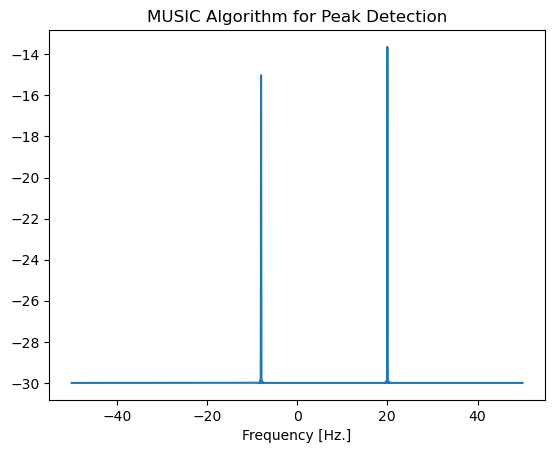

In [3]:
plt.plot(freq_array*fs,sum_array)
plt.title('MUSIC Algorithm for Peak Detection')
plt.xlabel('Frequency [Hz.]')
plt.show()